In [1]:
print("welcome to data analysis.")

welcome to data analysis.


In [2]:
run ./scripts/analysis_scripts.py

In [3]:
minimum_path = './computational-results-minimum/results_datatable'
additive_faces_path = './computational-results-additive-faces/results_datatable'
objective_zero_path = './computational-results-objective-zero/results_datatable'
objective_one_percent_path = './computational-results-objective-one-percent/results_datatable/'

In [152]:
## delta_pi_minimum results

# path for computational results.
path = minimum_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [153]:
df.head()

,instances,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,extreme_49_2s,5.26317,36.5309,4.98345,40.3538,37.8885,7.14982,36.3686,41.0409,26.150460,1719.18,5.74609,4.87015,5.65386,32.2114
1,nonsub_20,0.238569,3.02648,0.22851,2.91701,2.82879,0.280703,2.66158,2.84969,0.037871,426.189,0.269342,0.220591,0.272416,2.68305
2,extreme_34_2s,34.6006,224.621,19.5853,320.784,302.443,16.3037,208.926,313.528,35.925417,2124.02,17.1358,20.3054,17.8122,206.077
3,extreme_27,0.090047,0.53093,0.0907186,0.50864,0.517753,0.0924626,0.470802,0.507416,0.004252,1638.98,0.100194,0.0890944,0.0951181,0.482062
4,nonsub_38_2s,4.81493,468.956,41.64,750.905,53.2099,61.0882,567.508,683.192,3600.000000,426.924,50.0529,68.4821,1.82277,1.99161


In [154]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),4.762538,12.013101,4.361064,17.773702,12.413705,3.837699,16.084056,13.467165,9.961226,1404.594462,3.186906,4.842882,3.160555,10.46402


In [155]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),14.857177,26.62041,13.115981,38.920479,27.732581,10.854959,35.267583,29.776078,34.879223,1406.234328,9.108718,14.809175,9.420428,23.787711


In [156]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),40.264891,60.645859,33.520716,86.11601,63.482008,25.316356,77.629048,67.047947,92.685507,1414.812584,22.190271,37.941782,24.364911,55.699114


In [157]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound','mip_solver'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

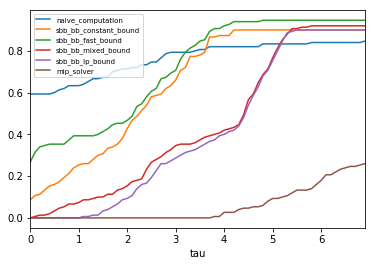

In [158]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 2,prop={'size': 7})
plt.savefig('pp_min.pdf')

In [159]:
## objective_zero results

# path for computational results.
path = objective_zero_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [160]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),6.577768,17.692351,5.564841,19.534646,19.282658,4.424418,17.499977,19.0278,9.915928,1559.989193,4.519433,5.45582,4.88518,17.718473


In [161]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),21.305583,39.977065,17.616025,44.336999,44.052362,13.153604,39.726109,43.661839,34.810922,1561.679693,13.406166,17.301143,14.779838,40.093675


In [162]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),58.653967,89.54866,46.407343,100.29507,100.124323,32.483486,89.314752,99.30851,92.734738,1570.539864,33.000979,45.707461,37.694423,90.148411


In [163]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound','mip_solver'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

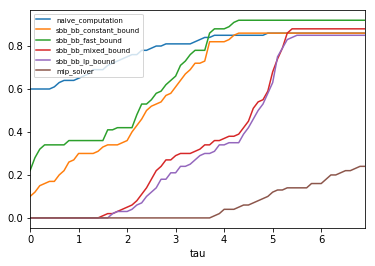

In [164]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 2,prop={'size': 7})
plt.savefig('pp_obg0.pdf')

In [165]:
## objective_one_percent results

# path for computational results.
path = objective_one_percent_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [166]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),1.62666,2.336079,1.521992,4.182796,4.168604,0.805614,2.290765,4.060389,10.012115,722.364194,0.813167,1.50516,0.833517,2.293473


In [167]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),3.057401,3.604094,2.83305,7.190262,7.214696,1.187027,3.554908,7.013627,35.021041,726.103192,1.202389,2.776759,1.239222,3.552383


In [168]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),4.039331,4.812806,3.687491,10.434747,10.579108,1.326684,4.773459,10.215928,93.127606,736.692963,1.345535,3.599123,1.392887,4.750489


In [169]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound','mip_solver'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

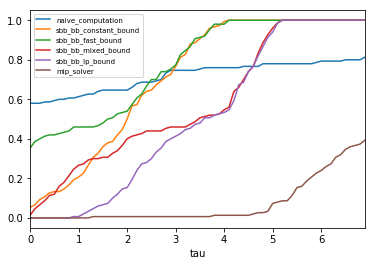

In [170]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 2,prop={'size': 7})
plt.savefig('pp_obg1.pdf')

In [171]:
## additive_faces results

# path for computational results.
path = additive_faces_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [172]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),7.329666,20.804736,6.997128,21.679598,21.646375,7.237729,20.844115,20.823675,6.560573,7.389603,6.916779,7.588034,20.520977


In [173]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),23.993129,46.400507,23.221973,47.978648,48.16309,23.660245,46.626903,47.193386,21.319798,24.049994,23.074846,24.39737,45.868477


In [174]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),67.273115,104.887659,65.700066,107.691408,108.127611,66.473635,105.320937,106.720331,54.384792,67.244517,65.458744,67.720415,103.759816


In [175]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

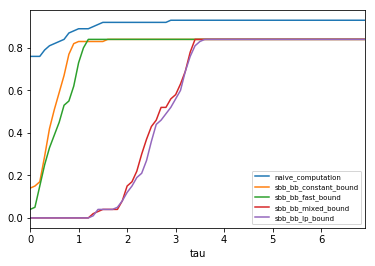

In [176]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 4,prop={'size': 7})
plt.savefig('pp_add.pdf')

In [177]:
path = minimum_path
df = generate_dataframe(path, metric = 'memory', stats = 'max', time_out = 3600)

In [181]:
## return all results for addive_faces results

# path for computational results.
path = additive_faces_path

In [178]:
max(df[df['naive_computation']!='TimeOut']['naive_computation'])

0.197479248046875

In [182]:
# time table
generate_dataframe(path, metric = 'time', stats='arithmetic_mean', time_out = 3600)

,instances,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,extreme_49_2s,10.2778,116.783,8.60559,121.261,128.497,11.4849,116.383,115.431,12.633680,11.6613,8.29018,13.0685,101.642
1,extreme_34_2s,31.0705,320.16,27.6971,349.042,338.039,33.1676,314.292,349.652,13.871689,36.6365,25.5815,41.8659,307.494
2,extreme_27,0.0948102,0.729384,0.0881288,0.792285,0.722938,0.104023,0.79014,0.732564,0.058221,0.107111,0.0885222,0.112057,0.791251
3,extreme_9,0.0774168,0.520628,0.0734575,0.534036,0.470289,0.0830431,0.465639,0.489428,0.052381,0.086509,0.0755395,0.089562,0.526174
4,extreme_45_2s,OutOfMemory,OutOfMemory,OutOfMemory,3600,3600,OutOfMemory,OutOfMemory,OutOfMemory,3600.000000,OutOfMemory,OutOfMemory,OutOfMemory,3600
5,extreme_38_2s,OutOfMemory,3600,OutOfMemory,3600,3600,OutOfMemory,3600,OutOfMemory,3600.000000,OutOfMemory,OutOfMemory,OutOfMemory,OutOfMemory
6,extreme_8,0.0665025,0.383492,0.0659044,0.392854,0.371457,0.0728377,0.34146,0.264331,0.051776,0.0731805,0.0643368,0.0768901,0.357139
7,extreme_26,0.063445,0.305278,0.0608045,0.306832,0.282914,0.0712969,0.339766,0.308379,0.050062,0.0672691,0.0622601,0.0735354,0.336449
8,extreme_18,0.172079,1.93947,0.156129,2.0472,2.01739,0.196332,1.90563,1.86008,0.078496,0.199554,0.14059,0.239771,1.98043
9,extreme_30,0.463708,4.95742,0.396598,5.63882,4.94574,0.433919,5.37055,5.24899,0.178553,0.432641,0.392499,0.494858,5.01364


In [183]:
# memory table
generate_dataframe(path, metric = 'memory', stats='max')

,instances,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,extreme_49_2s,0.355282,0.355808,0.352253,0.36372,0.38485,0.355003,0.337952,0.382996,0.192986,0.353992,0.352745,0.357746,0.371502
1,extreme_34_2s,0.697025,0.736572,0.687256,0.733627,0.734203,0.688732,0.727234,0.756283,0.220154,0.713364,0.691925,0.721561,0.751225
2,extreme_27,0.194656,0.203846,0.195084,0.201653,0.204201,0.194202,0.2038,0.2047,0.19442,0.194656,0.194569,0.193954,0.203556
3,extreme_9,0.188103,0.204113,0.19437,0.191933,0.203979,0.195133,0.20393,0.203773,0.194519,0.194706,0.194553,0.191978,0.203766
4,extreme_45_2s,OutOfMemory,OutOfMemory,OutOfMemory,TimeOut,TimeOut,OutOfMemory,OutOfMemory,OutOfMemory,TimeOut,OutOfMemory,OutOfMemory,OutOfMemory,TimeOut
5,extreme_38_2s,OutOfMemory,TimeOut,OutOfMemory,TimeOut,TimeOut,OutOfMemory,TimeOut,OutOfMemory,TimeOut,OutOfMemory,OutOfMemory,OutOfMemory,OutOfMemory
6,extreme_8,0.194557,0.203838,0.194725,0.204521,0.204178,0.194527,0.203846,0.204819,0.19455,0.191853,0.191704,0.194294,0.205471
7,extreme_26,0.189545,0.203754,0.194672,0.203922,0.204773,0.19532,0.204689,0.199627,0.194469,0.194469,0.194614,0.194775,0.204243
8,extreme_18,0.188511,0.20578,0.195187,0.205853,0.20607,0.195007,0.20594,0.205582,0.194572,0.194614,0.194679,0.195354,0.205933
9,extreme_30,0.191002,0.21022,0.200546,0.208614,0.210564,0.198696,0.210598,0.211765,0.19455,0.19949,0.201126,0.199387,0.209324


In [4]:
# delta pi minimum results
path = minimum_path

# generate dataframe for different statistical analysis, using parameter stats.  
time_df = generate_dataframe(path, metric = 'time', stats='arithmetic_mean')
memory_df = generate_dataframe(path, metric = 'memory', stats='max')

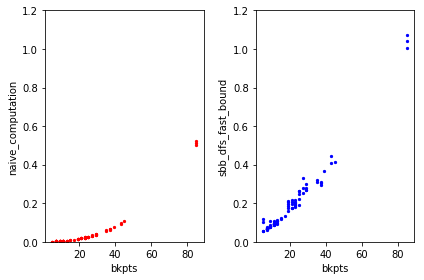

In [17]:
# scatter plot of breakpoints vs running time with #bkpts<100
time_df_plot=plot_scatter(time_df, metric = 'time', time_out = 3600)
fig, axes = plt.subplots(nrows=1, ncols=2)
time_df_plot[time_df_plot['bkpts']<100].plot.scatter(x='bkpts',y='naive_computation',s=5,c='red',ax=axes[0],ylim=(0,1.2))                               
time_df_plot[time_df_plot['bkpts']<100].plot.scatter(x='bkpts',y='sbb_dfs_fast_bound',s=5,c='blue',ax=axes[1], ylim=(0,1.2))
plt.tight_layout()
plt.savefig('minimum_time_bkpts_100.pdf')

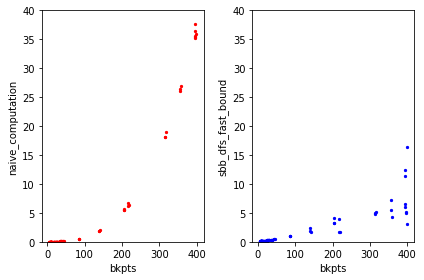

In [18]:
# scatter plot of breakpoints vs running time with #bkpts<400
time_df_plot=plot_scatter(time_df, metric = 'time', time_out = 3600)
fig, axes = plt.subplots(nrows=1, ncols=2)
time_df_plot[time_df_plot['bkpts']<400].plot.scatter(x='bkpts',y='naive_computation',s=5,c='red',ax=axes[0], ylim=(0,40))
time_df_plot[time_df_plot['bkpts']<400].plot.scatter(x='bkpts',y='sbb_dfs_fast_bound',s=5,c='blue',ax=axes[1],ylim=(0,40))
plt.tight_layout()
plt.savefig('minimum_time_bkpts_400.pdf')

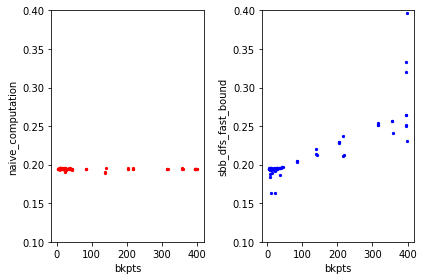

In [19]:
# scatter plot of breakpoints vs memory with #bkpts<400
memory_df_plot=plot_scatter(memory_df, metric = 'memory', memory_limit = 8)
fig, axes = plt.subplots(nrows=1, ncols=2)
memory_df_plot[memory_df_plot['bkpts']<400].plot.scatter(x='bkpts',y='naive_computation',s=5,c='red',ax=axes[0],ylim=(0.1,0.4))
memory_df_plot[memory_df_plot['bkpts']<400].plot.scatter(x='bkpts',y='sbb_dfs_fast_bound',s=5,c='blue',ax=axes[1],ylim=(0.1,0.4))
plt.tight_layout()
plt.savefig('minimum_memory_bkpts_400.pdf')

In [195]:
# additive faces results
path = additive_faces_path

# generate dataframe for different statistical analysis, using parameter stats.  
time_df = generate_dataframe(path, metric = 'time', stats='arithmetic_mean')
memory_df = generate_dataframe(path, metric = 'memory', stats='max')

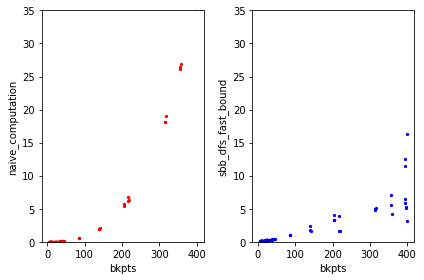

In [20]:
# scatter plot of breakpoints vs running time with #bkpts<400
time_df_plot=plot_scatter(time_df, metric = 'time', time_out = 3600)
fig, axes = plt.subplots(nrows=1, ncols=2)
time_df_plot[time_df_plot['bkpts']<400].plot.scatter(x='bkpts',y='naive_computation',s=5,c='red',ax=axes[0],ylim=(0,35))
time_df_plot[time_df_plot['bkpts']<400].plot.scatter(x='bkpts',y='sbb_dfs_fast_bound',s=5,c='blue',ax=axes[1],ylim=(0,35))
plt.tight_layout()
plt.savefig('additive_faces_time_bkpts_400.pdf')

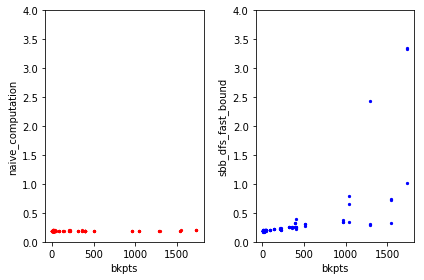

In [23]:
# scatter plot of breakpoints vs memory with #bkpts<2000
memory_df_plot=plot_scatter(memory_df, metric = 'memory', memory_limit = 8)
fig, axes = plt.subplots(nrows=1, ncols=2)
memory_df_plot[memory_df_plot['bkpts']<2000].plot.scatter(x='bkpts',y='naive_computation',s=5,c='red',ax=axes[0],ylim=(0,4))
memory_df_plot[memory_df_plot['bkpts']<2000].plot.scatter(x='bkpts',y='sbb_dfs_fast_bound',s=5,c='blue',ax=axes[1],ylim=(0,4))
plt.tight_layout()
plt.savefig('additive_faces_memory_bkpts_2000.pdf')

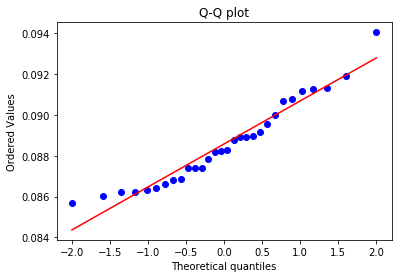

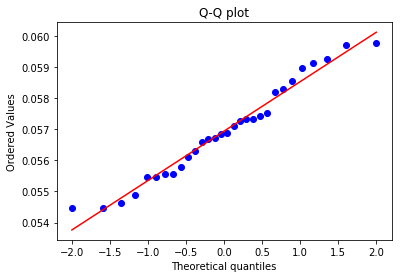

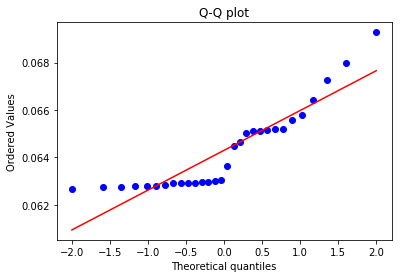

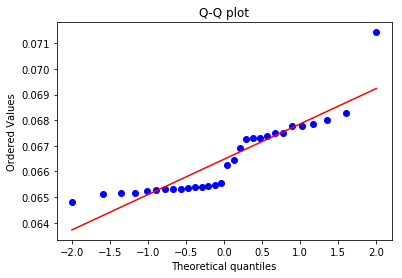

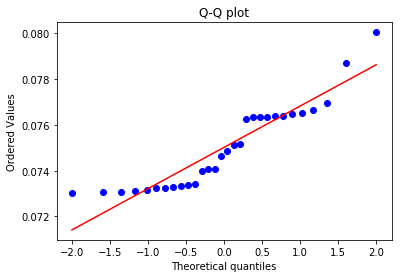

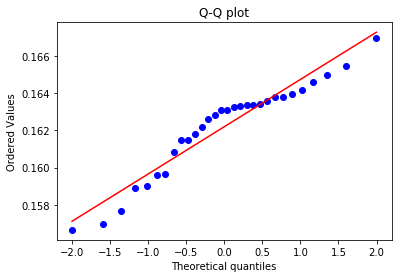

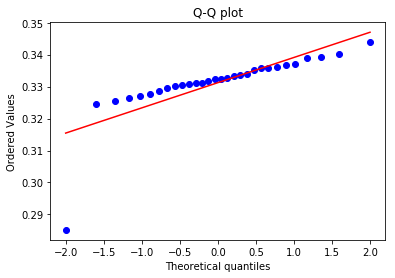

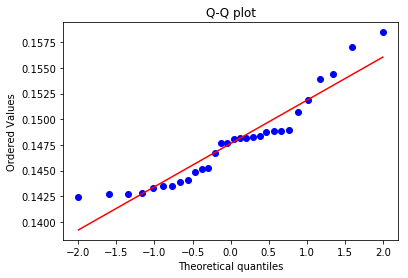

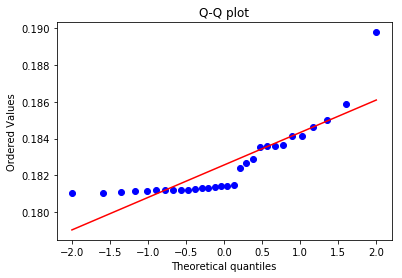

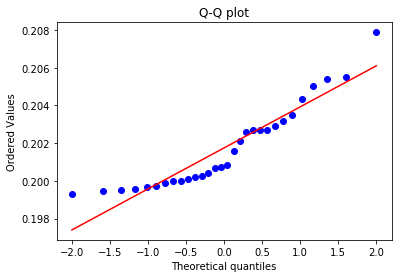

In [198]:
# random Q-Q plots
file_names = ['extreme_1', 'extreme_3', 'extreme_5', 'extreme_7', 'extreme_9',
         'extreme_11', 'extreme_13', 'extreme_15', 'extreme_17', 'extreme_19']
results_path = './computational-results-minimum/results_datatable/sbb_bb_constant_bound/'
for fname in file_names:
    qqplot('qqplot_' + fname + '.pdf', results_path + fname + '.csv', col = 'cputime(s)')
    pylab.show()
    pylab.close()

In [204]:
# compute the skew and kurtosis of simple cases
s1, k1 = skew_kurtosis_computation(minimum_path, col = 'cputime(s)')
s2, k2 = skew_kurtosis_computation(objective_one_percent_path, col = 'cputime(s)')
s3, k3 = skew_kurtosis_computation(objective_zero_path, col = 'cputime(s)')
s4, k4 = skew_kurtosis_computation(additive_faces_path, col = 'cputime(s)')
s = s1 + s2 + s3 + s4
k = k1 + k2 + k3 + k4

In [212]:
# positive skew and kurtosis ratio
print 'positive skew ratio: {}'.format(sum(1 if v >0 else 0 for v in s)*1.0/len(s))
print 'positive kurtosis ratio: {}'.format(sum(1 if v >0 else 0 for v in k)*1.0/len(s))

positive skew ratio: 0.738782051282
positive kurtosis ratio: 0.648148148148


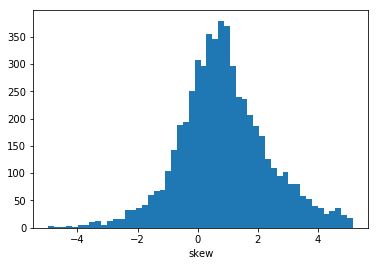

In [218]:
# histogram of skew
plt.hist(s, bins = 'auto')
plt.xlabel('skew')
plt.savefig('skew_distribution.pdf')

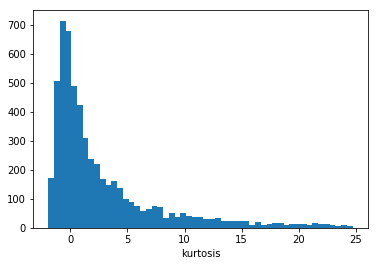

In [219]:
# histogram of kurtosis
plt.hist(k, bins = 'auto')
plt.xlabel('kurtosis')
plt.savefig('kurtosis_distribution.pdf')

In [225]:
# variance of cpu time and wall clock time
v1 = cputime_walltime_computation(minimum_path)
v2 = cputime_walltime_computation(objective_one_percent_path)
v3 = cputime_walltime_computation(objective_zero_path)
v4 = cputime_walltime_computation(additive_faces_path)
v = v1 + v2 + v3 + v4

In [226]:
print 'Percentage of computations with larger wall clock time variance: {}'.format(sum(1 if x[0]<x[1] else 0 for x in v)*1.0/len(v))

Percentage of computations with larger wall clock time variance: 0.662749287749


In [220]:
# max range of cpu time and wall clock time
mr_cpu = max(max_range(minimum_path, 'cputime(s)'),
             max_range(objective_one_percent_path, 'cputime(s)'),
             max_range(objective_zero_path, 'cputime(s)'),
             max_range(additive_faces_path, 'cputime(s)'))
mr_wall = max(max_range(minimum_path, 'walltime(s)'),
             max_range(objective_one_percent_path, 'walltime(s)'),
             max_range(objective_zero_path, 'walltime(s)'),
             max_range(additive_faces_path, 'walltime(s)'))
print 'Max range of cpu time (s): {}'.format(mr_cpu)
print 'Max range of wall clock time (s): {}'.format(mr_wall)

Max range of cpu time (s): 51.871161
Max range of wall clock time (s): 105.786678553


In [238]:
# Levene's test on whether two samples have equal variance
p1 = same_variance_p_value(minimum_path, alpha = 0.05, parametric = False)
p2 = same_variance_p_value(objective_one_percent_path, alpha = 0.05, parametric = False)
p3 = same_variance_p_value(objective_zero_path, alpha = 0.05, parametric = False)
p4 = same_variance_p_value(additive_faces_path, alpha = 0.05, parametric = False)
p = p1 + p2 + p3 + p4

In [239]:
print 'Levene test, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

Levene test, Percentage of null hypothesis rejection: 0.0185185185185


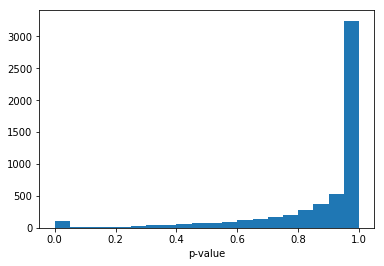

In [240]:
# distribution of p values in Levene's test
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('Levene_p_value_distribution.pdf')

In [249]:
# Bartlett's test on whether two samples have equal variance
p1 = same_variance_p_value(minimum_path, alpha = 0.05, parametric = True)
p2 = same_variance_p_value(objective_one_percent_path, alpha = 0.05, parametric = True)
p3 = same_variance_p_value(objective_zero_path, alpha = 0.05, parametric = True)
p4 = same_variance_p_value(additive_faces_path, alpha = 0.05, parametric = True)
p = p1 + p2 + p3 + p4

In [250]:
print 'Bartlett test, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

Bartlett test, Percentage of null hypothesis rejection: 0.0489672364672


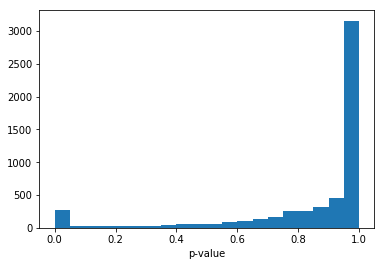

In [251]:
# distribution of p values in Barlett's test
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('Bartlett_p_value_distribution.pdf')


In [254]:
# Maximum Likelihood estimation of parameters in given distribution family.

In [252]:
# Normal distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'norm')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'norm')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'norm')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'norm')
p = p1 + p2 + p3 + p4

Normal distribution fitting, Percentage of null hypothesis rejection: 0.275819088319


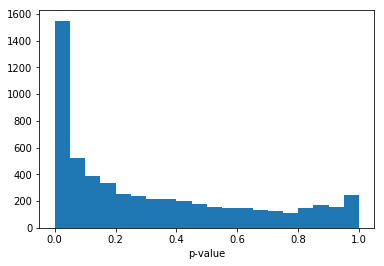

In [253]:
# distribution of p values in normal distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('Normal_p_value_distribution.pdf')
print 'Normal distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [255]:
# Lognormal distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'lognorm')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'lognorm')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'lognorm')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'lognorm')
p = p1 + p2 + p3 + p4

Lognormal distribution fitting, Percentage of null hypothesis rejection: 0.210292022792


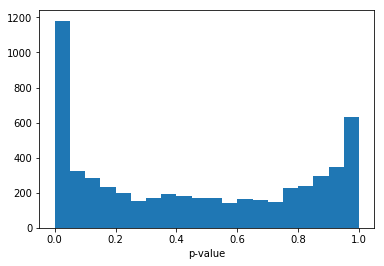

In [256]:
# distribution of p values in lognormal distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('Lognormal_p_value_distribution.pdf')
print 'Lognormal distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [257]:
# Exponential distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'exponential')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'exponential')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'exponential')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'exponential')
p = p1 + p2 + p3 + p4

Exponential distribution fitting, Percentage of null hypothesis rejection: 0.530092592593


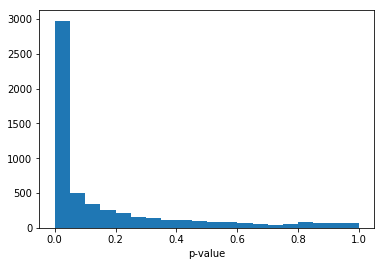

In [258]:
# distribution of p values in exponential distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('Exponential_p_value_distribution.pdf')
print 'Exponential distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [303]:
# F distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'f')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'f')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'f')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'f')
p = p1 + p2 + p3 + p4

/Users/arsenalcrown/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/arsenalcrown/.local/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


F distribution fitting, Percentage of null hypothesis rejection: 0.24358974359


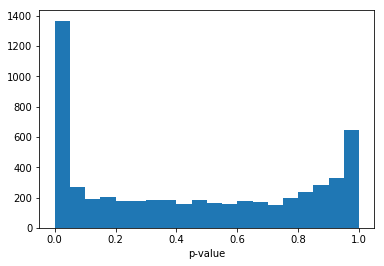

In [304]:
# distribution of p values in F distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('F_p_value_distribution.pdf')
print 'F distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [305]:
# t distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 't')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 't')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 't')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 't')
p = p1 + p2 + p3 + p4

t distribution fitting, Percentage of null hypothesis rejection: 0.120192307692


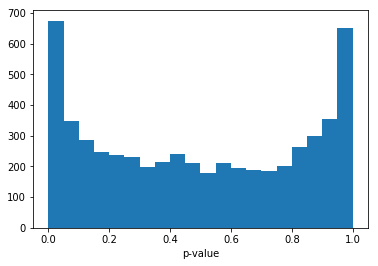

In [306]:
# distribution of p values in t distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('t_p_value_distribution.pdf')
print 't distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [307]:
# cauchy distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'cauchy')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'cauchy')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'cauchy')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'cauchy')
p = p1 + p2 + p3 + p4

Cauchy distribution fitting, Percentage of null hypothesis rejection: 0.118945868946


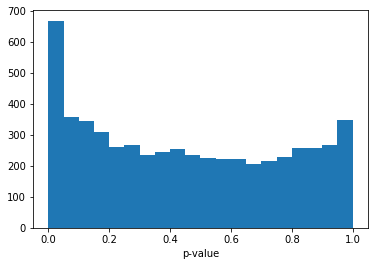

In [308]:
# distribution of p values in cauchy distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('cauchy_p_value_distribution.pdf')
print 'Cauchy distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [309]:
# chi distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'chi')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'chi')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'chi')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'chi')
p = p1 + p2 + p3 + p4

Chi distribution fitting, Percentage of null hypothesis rejection: 0.550213675214


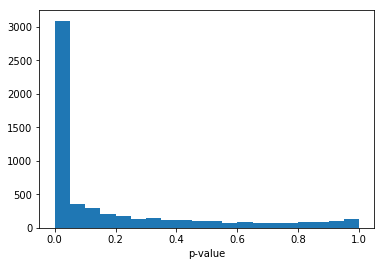

In [310]:
# distribution of p values in chi distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('chi_p_value_distribution.pdf')
print 'Chi distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [311]:
# chi squared distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'chi2')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'chi2')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'chi2')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'chi2')
p = p1 + p2 + p3 + p4

Chi squared distribution fitting, Percentage of null hypothesis rejection: 0.946225071225


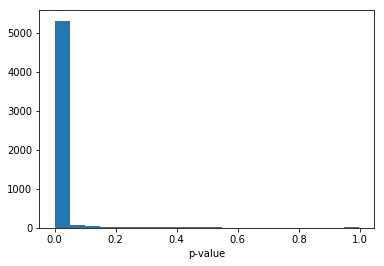

In [312]:
# distribution of p values in chi squared distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('chi2_p_value_distribution.pdf')
print 'Chi squared distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [313]:
# foldnorm distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'foldnorm')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'foldnorm')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'foldnorm')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'foldnorm')
p = p1 + p2 + p3 + p4

/Users/arsenalcrown/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1625: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


foldnorm distribution fitting, Percentage of null hypothesis rejection: 0.475427350427


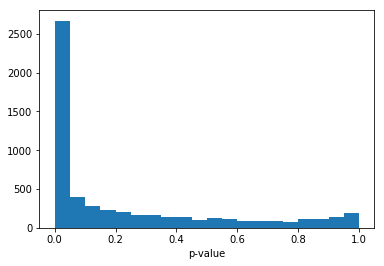

In [314]:
# distribution of p values in foldnorm distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('foldnorm_p_value_distribution.pdf')
print 'foldnorm distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [315]:
# truncnorm distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'truncnorm')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'truncnorm')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'truncnorm')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'truncnorm')
p = p1 + p2 + p3 + p4

/Users/arsenalcrown/.local/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:6348: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/Users/arsenalcrown/.local/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:6348: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


truncnorm distribution fitting, Percentage of null hypothesis rejection: 0.923433048433


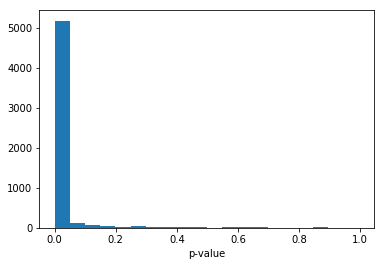

In [316]:
# distribution of p values in truncnorm distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('truncnorm_p_value_distribution.pdf')
print 'truncnorm distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [318]:
# foldcauchy distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'foldcauchy')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'foldcauchy')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'foldcauchy')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'foldcauchy')
p = p1 + p2 + p3 + p4

foldcauchy distribution fitting, Percentage of null hypothesis rejection: 0.395477207977


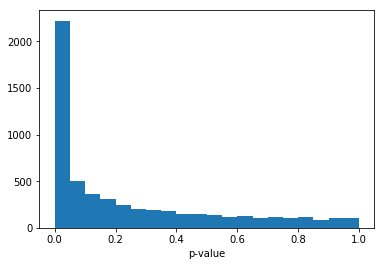

In [319]:
# distribution of p values in foldcauchy distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('foldcauchy_p_value_distribution.pdf')
print 'foldcauchy distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [320]:
# halfcauchy distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'halfcauchy')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'halfcauchy')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'halfcauchy')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'halfcauchy')
p = p1 + p2 + p3 + p4

halfcauchy distribution fitting, Percentage of null hypothesis rejection: 0.46599002849


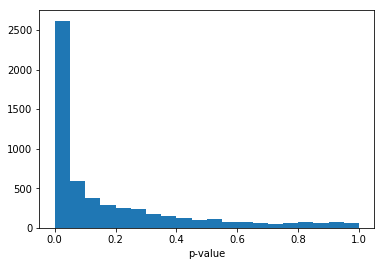

In [321]:
# distribution of p values in halfcauchy distribution fitting.
plt.hist(p, bins = 20)
plt.xlabel('p-value')
plt.savefig('halfcauchy_p_value_distribution.pdf')
print 'halfcauchy distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

In [279]:
# Simulations on efficiency and robustness of stopping rules
# Stop collecting data if relative precision is small.
# Long time computation

In [281]:
# Confidence interval computation based on normal assumptions.
# Only care about non-easy computations, at least 10s run time, with relative precision 0.01, 1000 independent runs, 10 pilot size and significance level 0.95.
c1, s1, t1 = coverage_and_average_final_sample_size(minimum_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "norm")
c2, s2, t2 = coverage_and_average_final_sample_size(objective_one_percent_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "norm")
c3, s3, t3 = coverage_and_average_final_sample_size(objective_zero_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "norm")
c4, s4, t4 = coverage_and_average_final_sample_size(additive_faces_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "norm")
normal_coverage = c1 + c2 + c3 + c4
normal_final_size = s1 + s2 + s3 + s4
normal_true_mean = t1 + t2 + t3 + t4

In [282]:
# Confidence interval computation based on lognormal assumptions.
# Only care about non-easy computations, at least 10s run time, with relative precision 0.01, 1000 independent runs, 10 pilot size and significance level 0.95.
c1, s1, t1 = coverage_and_average_final_sample_size(minimum_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
c2, s2, t2 = coverage_and_average_final_sample_size(objective_one_percent_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
c3, s3, t3 = coverage_and_average_final_sample_size(objective_zero_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
c4, s4, t4 = coverage_and_average_final_sample_size(additive_faces_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
lognormal_coverage = c1 + c2 + c3 + c4
lognormal_final_size = s1 + s2 + s3 + s4
lognormal_true_mean = t1 + t2 + t3 + t4

In [292]:
simulation_df = pd.DataFrame()
simulation_df['normal_coverage'] = normal_coverage
simulation_df['normal_final_size'] = normal_final_size
simulation_df['normal_true_mean'] = normal_true_mean
simulation_df['lognormal_coverage'] = lognormal_coverage
simulation_df['lognormal_final_size'] = lognormal_final_size
simulation_df['lognormal_true_mean'] = lognormal_true_mean
print 'Number of cases: {}'.format(simulation_df.shape[0])

Number of cases: 994


In [293]:
print 'Average coverage using normal distribution: {}'.format(np.mean(simulation_df['normal_coverage']))
print 'Average coverage using normal distribution: {}'.format(np.mean(simulation_df['lognormal_coverage']))
print 'Average final sample size using normal distribution: {}'.format(np.mean(simulation_df['normal_final_size']))
print 'Average final sample size using lognormal distribution: {}'.format(np.mean(simulation_df['lognormal_final_size']))

Average coverage using normal distribution: 0.91073943662
Average coverage using normal distribution: 0.910237424547
Average final sample size using normal distribution: 33.6891348089
Average final sample size using lognormal distribution: 29.5221327968


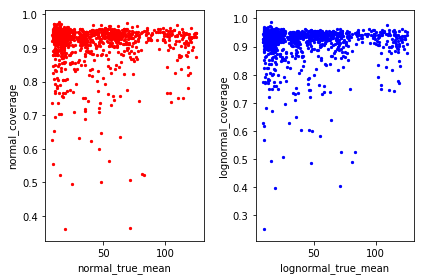

In [294]:
# scatter plot: true mean vs coverage
fig, axes = plt.subplots(nrows=1, ncols=2)
simulation_df.plot.scatter(x='normal_true_mean',y='normal_coverage',s=5,c='red',ax=axes[0])
simulation_df.plot.scatter(x='lognormal_true_mean',y='lognormal_coverage',s=5,c='blue',ax=axes[1])
plt.tight_layout()
plt.savefig('coverage_plot.pdf')

In [301]:
simulation_df[simulation_df['normal_final_size']==10].shape[0]

560

In [343]:
# Confidence interval computation based on lognormal assumptions.
# Only care about non-easy computations, at least 10s run time, with relative precision 0.01, 1000 independent runs, 10 pilot size and significance level 0.95.
c1, s1, t1 = coverage_and_average_final_sample_size(minimum_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
c2, s2, t2 = coverage_and_average_final_sample_size(objective_one_percent_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
c3, s3, t3 = coverage_and_average_final_sample_size(objective_zero_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
c4, s4, t4 = coverage_and_average_final_sample_size(additive_faces_path, min_time_threshold = 10, precision = 0.01, iteration = 1000, pilot_size = 10, alpha = 0.95, distribution = "lognorm")
lognormal_coverage = c1 + c2 + c3 + c4
lognormal_final_size = s1 + s2 + s3 + s4
lognormal_true_mean = t1 + t2 + t3 + t4

KeyboardInterrupt: 

In [349]:
stats.lognorm.fit(data,floc = 0)

(0.012299181364873856, 0.0, 5.438481394946464)

In [353]:
# Lognormal distribution
p1 = MLE_fit_rejection_ratio(minimum_path, distribution = 'lognorm')
p2 = MLE_fit_rejection_ratio(objective_one_percent_path,distribution = 'lognorm')
p3 = MLE_fit_rejection_ratio(objective_zero_path, distribution = 'lognorm')
p4 = MLE_fit_rejection_ratio(additive_faces_path, distribution = 'lognorm')
p = p1 + p2 + p3 + p4

In [354]:
print 'Lognormal distribution fitting, Percentage of null hypothesis rejection: {}'.format(sum(1 if v < 0.05 else 0 for v in p)*1.0/len(p))

Lognormal distribution fitting, Percentage of null hypothesis rejection: 0.271545584046
